scikit-learn
在训练集上训练模型
.fit()
在测试集上测试模型
.perdict()
保存模型
pickle.dumps()

数据工程
特征提取
特征归一化（normalization）
特征标准化preprocessing.scale()
trian_test_split()辅助随机分割训练集、测试集

训练模型
score()对Estimator进行评分
回归模型：使用‘决定系数’评分（Coefficient of Determination）
分类模型：使用‘准确率’评分（accuracy）
测试模型
model.predict(X_test)
返回测试样本的预测标签
model.score(predict, label_test)
根据预测值和真实值计算评分

In [1]:
import matplotlib
%matplotlib inline
from visualization import plot_pic
import warnings;warnings.simplefilter('ignore')

## 数据集生成及特征工程处理

In [2]:
#生成测试集数据
from produce_data import produce_data
data = produce_data()

In [4]:
data.head()

,practice,time_period,error,label
0,0.548814,0.592880,0.811518,1.0
1,0.715189,0.010064,0.476084,0.0
2,0.602763,0.475826,0.523156,1.0
3,0.544883,0.708770,0.250521,1.0
4,0.423655,0.043975,0.605043,0.0


In [12]:
#准备训练集，测试集数据，核心
from sklearn.model_selection import train_test_split    
feature_train, feature_test, label_train, label_test = train_test_split(data[['practice','time_period']],data['label'], test_size=0.25)

In [14]:
train_test_split?

In [15]:
feature_train.tail()

,practice,time_period
83,0.692472,0.967338
161,0.453543,0.155978
576,0.160468,0.257822
468,0.839189,0.671528
545,0.016872,0.298246


In [16]:
label_train.tail()

83     1.0
161    0.0
576    0.0
468    1.0
545    0.0
Name: label, dtype: float64

In [18]:
len(feature_train)

750

In [22]:
# 把训练集的属性和标签合并在一起；也可以用merge合并；train_data是用于后续的可视化
train_data = feature_train.copy()   #.copy如果直接相等，只是指引指向了feature_train的dataFrame,修改任何一个dataframe都会修改数据
train_data['label'] = label_train
train_data.head()

,practice,time_period,label
340,0.370853,0.258059,0.0
821,0.000546,0.340605,0.0
154,0.123820,0.800256,1.0
985,0.492361,0.342226,1.0
996,0.514922,0.721198,1.0


In [23]:
# 为了画图做准备，把训练集中的fail和pass标签筛选出来
practice_fail = train_data[train_data['label'] ==0]['practice']
time_period_fail = train_data[train_data['label'] ==0]['time_period']

practice_pass = train_data[train_data['label']==1]['practice']
time_period_pass = train_data[train_data['label']==1]['time_period']

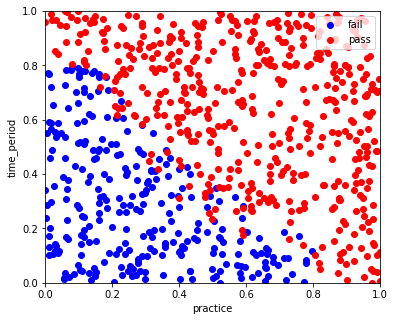

In [26]:
# 数据集可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.scatter(practice_fail,time_period_fail,color='b',label='fail')
plt.scatter(practice_pass,time_period_pass,color='r',label='pass')
plt.xlabel('practice')
plt.ylabel('time_period')
plt.legend(loc='upper right')

## 逻辑回归算法实现

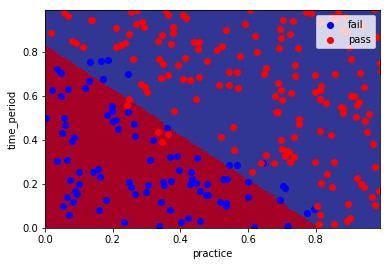

In [27]:
from sklearn.linear_model import LogisticRegression  #从sklearn中引入逻辑回归算法

clf_LR = LogisticRegression()       #定义了逻辑回归的分类器
clf_LR.fit(feature_train,label_train)   #训练模型
pre_LR = clf_LR.predict(feature_test)   #在测试集上测试训练好的模型，返回的是测试集的label

plot_pic(clf_LR, feature_test, label_test)    #测试集的分类效果可视化，传入已经学习好的分类器和测试集特征和标签，并把结果可视化

In [28]:
from sklearn.metrics import accuracy_score    #计算分类结果准确性，通过测试集预测标签和真是标签之间对比，计算分类结果准确性
acc = accuracy_score(pre_LR, label_test)
acc 

0.932

## 决策树算法实现

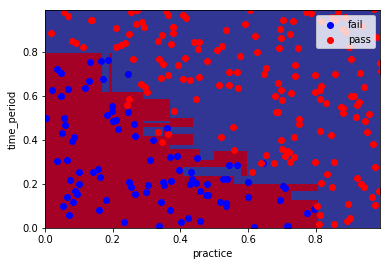

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
feature_train,feature_test,label_train,label_test = train_test_split(data[['practice','time_period']],data['label'],test_size=0.25)
clf_DT = DecisionTreeClassifier()
clf_DT.fit(feature_train,label_train)
pred_DT = clf_DT.predict(feature_test)

plot_pic(clf_DT, feature_test,label_test)

In [4]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_DT, label_test)
acc 

0.96

## 随机森林算法实现

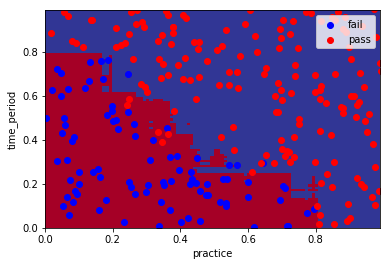

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf_RFC = RandomForestClassifier()
clf_RFC.fit(feature_train,label_train)
pred_RFC = clf_RFR.predict(feature_test)


plot_pic(clf_RFR,feature_test,label_test)

In [9]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_RFC,label_test)
acc 

0.96

## KNN实现

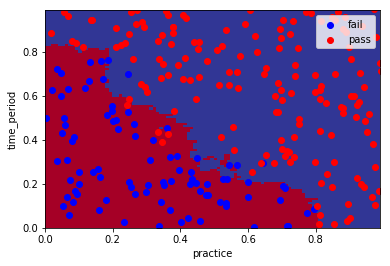

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors = 7)    #n_neighbors控制查看元素个数
clf_KNN.fit(feature_train,label_train)
pred_KNN = clf_KNN.predict(feature_test)

plot_pic(clf_KNN, feature_test, label_test)

In [16]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_KNN, label_test)
acc 

0.952

## 朴素贝叶斯算法实现

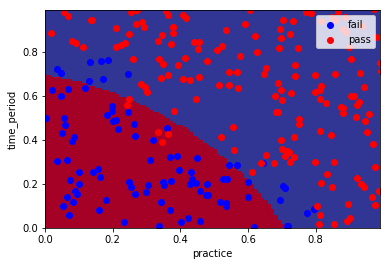

In [18]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(feature_train, label_train)
pred_NB = clf_NB.predict(feature_test)

plot_pic(clf_NB, feature_test, label_test)

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_NB, label_test)
acc 

0.912